In [203]:
import pandas as pd
import numpy as np
import seaborn as sb
from langdetect import detect
from textblob import TextBlob

In [204]:
df_1 = pd.read_csv('articles.csv',names = ['User','Followers','Following','Order','Title','Author','Followinga','Followersa','Tags','Link_a',
                                        'ordera','date','figures','claps','words','sent','comments','complex','featured','refs'])
df_1['Order']=df_1['Order']/2
df_1['data_parsed']='Jul 13, 2018'

In [205]:
df_2 = pd.read_csv('full_combined.csv',names = ['User','Followers','Following','Order','Title','Author','Followinga','Followersa','Tags','Link_a',
                                        'ordera','date','figures','claps','words','sent','comments','complex','featured','refs'])
df_2['Order']=df_2['Order']/2
df_2['data_parsed']='Jul 11, 2018'

In [206]:
df_ = pd.read_csv('again_2.csv',names = ['Title','Author','Followinga','Followersa','Tags','link','date','figures','claps','words','sent','comments','complex','featured','refs'])
df_['data_parsed']='Jul 16, 2018'

In [207]:
t1 = pd.read_csv('timeline_2.csv',names = ['User','Order','Link'])
t2 = pd.read_csv('timeline_3.csv',names = ['User','Order','Link'])
timeline = t1.append(t2,ignore_index = True)
df_3 = timeline.merge(df_,left_on = 'Link',right_on = 'link',how = 'inner')

In [208]:
df_4 = pd.read_csv('again_4.csv',names = ['User','Order','Title','Author','Followinga','Followersa','Tags','link','date','figures','claps','words','sent','comments','complex','featured','refs'])
df_4['data_parsed']='Jul 19, 2018'

In [209]:
df__ = pd.read_csv('again_6.csv',encoding = 'latin-1',names = ['Title','Author','Followinga','Followersa','Tags','link','date','figures','claps','words','sent','comments','complex','featured','refs'])
timeline = pd.read_csv('timeline_6.csv',encoding = 'latin-1',names = ['User','Order','Link'])

df_5 = timeline.merge(df__,left_on = 'Link',right_on = 'link',how = 'inner')
df_5['data_parsed']='Jul 20, 2018'

In [210]:
df_6 = pd.read_csv('again_7.csv',engine = 'python',names = ['User','Order','Title','Author','Followinga','Followersa','Tags','link','date','figures','claps','words','sent','comments','complex','featured','refs'])
df_6['data_parsed']='Jul 21, 2018'

In [211]:
df_7 = pd.read_csv('again_8.csv',engine = 'python',names = ['User','Order','Title','Author','Followinga','Followersa','Tags','link','date','figures','claps','words','sent','comments','complex','featured','refs'])
df_7['data_parsed']='Jul 22, 2018'

In [212]:
df_8 = pd.read_csv('again_9.csv',engine = 'python',names = ['User','Order','Title','Author','Followinga','Followersa','Tags','link','date','figures','claps','words','sent','comments','complex','featured','refs'])
df_8['data_parsed']='Jul 23, 2018'

In [213]:
my_df = df_1.append(df_2,ignore_index = True)
my_df = my_df.append(df_3,ignore_index = True)
my_df = my_df.append(df_4,ignore_index = True)
my_df = my_df.append(df_5,ignore_index = True)
my_df = my_df.append(df_6,ignore_index = True)
my_df = my_df.append(df_7,ignore_index = True)
my_df = my_df.append(df_8,ignore_index = True)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [214]:
my_df.shape

(18281, 23)

In [215]:
my_df.Title.value_counts()

The New Data Economy — Share or Perish                                                              51
Quadrant Assets Airdrop — Round 2                                                                   33
Defining Digital Identity — Part One                                                                29
EXCHANGE LISTING ALERT: ZANTECOIN TO BE LISTED ON HOTBIT                                            29
The Most Important Skill Nobody Taught You                                                          27
[Chinese] Inmusik 白皮书 (V1.09)                                                                       26
Inmusik Lightpaper                                                                                  25
How I used a simple Google query to mine passwords from dozens of public Trello boards              24
What exactly can you do with Python? Here are Python’s 3 main applications.                         23
What IÕm Telling Business People About Why Relational Databases Are SoÊBa

In [216]:
null_ts = my_df[(my_df['link'].isnull()==False)&((my_df['Title'].isnull()==True)|(len(my_df['Title'])<3))].link

In [217]:
null_ts = pd.DataFrame(null_ts)

In [218]:
null_ts = null_ts.drop_duplicates()

In [219]:
null_ts.shape

(1625, 1)

In [220]:
null_ts.to_csv('find_titles.csv')

In [221]:
titles = pd.read_csv('titles_fixed.csv')

In [222]:
titles = titles.drop_duplicates()

In [223]:
together = null_ts.merge(titles, left_on = 'link',right_on='url',how = 'left')

In [224]:
together.shape

(1625, 3)

In [225]:
together= together[together['Title'].isnull()==False]

In [226]:
together.shape

(1276, 3)

In [227]:
total = my_df.merge(together, left_on = 'link',right_on = 'link',how = 'left')

In [228]:
total.columns

Index(['Author', 'Followers', 'Followersa', 'Following', 'Followinga', 'Link',
       'Link_a', 'Order', 'Tags', 'Title_x', 'User', 'claps', 'comments',
       'complex', 'data_parsed', 'date', 'featured', 'figures', 'link',
       'ordera', 'refs', 'sent', 'words', 'url', 'Title_y'],
      dtype='object')

In [229]:
total['Title'] = np.where((total['Title_x'].isnull()==True) & (total['Title_y'].isnull()==False), total['Title_y'], total['Title_x'])


In [230]:
my_df.isnull().sum()

Author           935
Followers      12967
Followersa      1092
Following      12967
Followinga       275
Link           13699
Link_a         12967
Order              0
Tags            1248
Title           2850
User               0
claps             56
comments           0
complex          133
data_parsed        0
date              24
featured           0
figures            0
link            5314
ordera         12967
refs               0
sent            7752
words              0
dtype: int64

In [231]:
total.isnull().sum()

Author           935
Followers      12967
Followersa      1092
Following      12967
Followinga       275
Link           13699
Link_a         12967
Order              0
Tags            1248
Title_x         2850
User               0
claps             56
comments           0
complex          133
data_parsed        0
date              24
featured           0
figures            0
link            5314
ordera         12967
refs               0
sent            7752
words              0
url            16301
Title_y        16301
Title            872
dtype: int64

In [232]:
total = total.drop(['Title_x','Title_y'],axis = 1)

In [233]:
def remove_non_ascii(text):
    return ''.join(i for i in str(text) if ord(i)<128)

In [234]:
total['title']=total['Title'].apply(remove_non_ascii)

In [235]:
total['title'].nunique()

9502

In [236]:
def alpha_only(title):
    return ''.join(filter(str.isalpha, title))

In [237]:
total['title_t']=total['title'].apply(alpha_only)

In [238]:
total['title_t'].nunique()

9367

In [239]:
total['title_t'].value_counts().head(10)

nan                                                               872
FindOutWhatGoogleandFacebookKnowAboutYou                          384
                                                                  128
TheNewDataEconomyShareorPerish                                     51
WhatImTellingBusinessPeopleAboutWhyRelationalDatabasesAreSoBad     46
ThisisHowGooglewillCollapse                                        33
QuadrantAssetsAirdropRound                                         33
WhatexactlycanyoudowithPythonHerearePythonsmainapplications        32
TheMostImportantSkillNobodyTaughtYou                               31
DefiningDigitalIdentityPartOne                                     30
Name: title_t, dtype: int64

In [240]:
total[total['title_t']==''].Author.value_counts()

Dovydas Reinikevicius              12
Bixtrim                             9
Evonne Tsai                         7
����ӡ Watin                         4
Joel Fukuzawa                       4
游舒帆-gipi                            4
Not about code                      3
Jeromy-Yu von ����ݬ��ʊ�܎��          3
ALPHA Camp 台灣                       2
Eric Kubik                          2
Joris Wu                            2
侯智薰（Raymond CH Hou）                 2
��_���                              2
Natalia Kryukova                    2
Yuren Ju                            2
Livia Yang                          2
rudileung                           2
行銷資料科學                              2
imToken                             2
Jasmine Lin                         2
Ivan Li ��_��_��_ - �����ь�_���     2
Workafrolic (±∞)                    2
陳品                                  2
Fred Jame                           2
Yao-Jen Kuo                         2
TheKey                              2
PlayBets    

In [241]:
total['title']=total['title_t']
total = total.drop('title_t',axis = 1)

In [242]:
total['Author']=total['Author'].apply(remove_non_ascii)

In [243]:
#total = total.drop('Title',axis = 1)

In [244]:
total['Author'].value_counts().head(10)

nan                  935
William Koehrsen     195
Peer Mountain        149
Enigma Project       145
George Seif          141
Stephen Young        130
Neurogress           128
Agro Tech Farm       114
Benjamin P. Hardy    112
BitNautic            110
Name: Author, dtype: int64

In [245]:
total[total['title']=='nan'].Author.value_counts().head()

nan                  82
ZANTEPAY             23
Benjamin P. Hardy    15
Game Loot Network    14
Samuel Sendon II     12
Name: Author, dtype: int64

In [246]:
total[total['Author']=='Baratunde Thurston']

,Author,Followers,Followersa,Following,Followinga,Link,Link_a,Order,Tags,User,...,featured,figures,link,ordera,refs,sent,words,url,Title,title


In [247]:
total['Author']=np.where((total['title']=='FindOutWhatGoogleandFacebookKnowAboutYou'),'Baratunde Thurston',total['Author'])
total['Author']=np.where((total['title']=='HowaTVSitcomTriggeredtheDownfallofWesternCivilization'),'David Hopkins',total['Author'])
total['Author']=np.where((total['title']=='SurvivaloftheRichest'),'douglas rushkoff',total['Author'])
total['Author']=np.where((total['title']=='HowIFullyQuitGoogleAndYouCanToo'),'Nithin Coca',total['Author'])
total['Author']=np.where((total['title']=='MagicPillsMachineLearningSkincareandtheFutureofHealth'),'Alyssa Giacobbe',total['Author'])
total['Author']=np.where((total['title']=='TheEndofRoevWadeWasEasytoSeeComing'),'Sady Doyle',total['Author'])

In [248]:
total[total['Tags'].isnull()==True].title.value_counts()

FindOutWhatGoogleandFacebookKnowAboutYou                        384
nan                                                             213
SurvivaloftheRichest                                             15
HowaTVSitcomTriggeredtheDownfallofWesternCivilization            14
HowIFullyQuitGoogleAndYouCanToo                                  12
MagicPillsMachineLearningSkincareandtheFutureofHealth            12
TheEndofRoevWadeWasEasytoSeeComing                               10
                                                                 10
ReversedAgingPigOrgansandtheFutureofHumankind                     9
YesYouShouldDeleteFacebook                                        8
TheCognitionCrisis                                                8
PornIsNottheWorstThingonMusically                                 8
HowDoesSpotifyKnowYouSoWell                                       7
TheLifespanofaLie                                                 7
HowDoesNetflixMakeSoMuchMoney                   

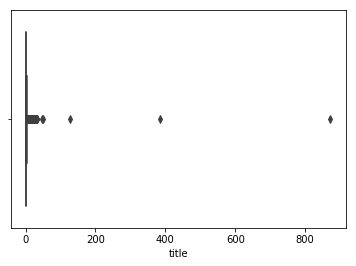

In [249]:
sb.boxplot(total['title'].value_counts())

In [250]:
total['title'].value_counts().head()

nan                                                               872
FindOutWhatGoogleandFacebookKnowAboutYou                          384
                                                                  128
TheNewDataEconomyShareorPerish                                     51
WhatImTellingBusinessPeopleAboutWhyRelationalDatabasesAreSoBad     46
Name: title, dtype: int64

In [251]:
total['Author'].nunique()

5442

In [252]:
total['User'].nunique()

2164

In [253]:
total['featured']=np.where((total['Tags'].isnull()==True),1,0)

In [254]:
total['featured'].value_counts()

0    17033
1     1248
Name: featured, dtype: int64

In [255]:
total[total['Author']=='nan'].link.value_counts()

https://www.medium.com/p/a1482e889fcb?source=user_profile---------7-------------------     3
https://www.medium.com/p/d869212b1f62?source=user_profile---------4-------------------     3
https://www.medium.com/p/b43e80edcf60?source=user_profile---------8-------------------     3
https://www.medium.com/p/50f1cdb1e014?source=user_profile---------3-------------------     3
https://www.medium.com/p/275a33bb6e9c?source=user_profile---------2-------------------     2
https://www.medium.com/p/d481390bfcee?source=user_profile---------11-------------------    2
https://www.medium.com/p/dfeeddb9338d?source=user_profile---------9-------------------     2
https://www.medium.com/p/9be84343c713?source=user_profile---------4-------------------     2
https://www.medium.com/p/b381e60d32f9?source=user_profile---------3-------------------     2
https://www.medium.com/p/4a14570fe6b0?source=user_profile---------2-------------------     2
https://www.medium.com/p/c55d9f79449?source=user_profile---------6----

In [256]:
def get_lang(title):
    try:
        lang = detect(title)
    except:
        #print(title)
        lang = 'not sure'
    return lang

In [257]:
total['language']=total['title'].apply(get_lang)

In [258]:
total['language'].value_counts()

en          14900
tl            934
de            342
it            286
nl            182
no            170
id            130
not sure      128
af            126
fr            118
da            116
ro            110
et            110
es            106
ca             92
pt             92
fi             83
sv             43
sw             42
vi             28
cy             28
tr             25
pl             20
so             18
hr             14
lt             13
sl              9
cs              6
sk              5
lv              2
sq              2
hu              1
Name: language, dtype: int64

In [259]:
def fix_date(date):
    if type(date)!=str:
        date = 0
    elif len(date)<10:
        date = date+", 2018"
    return date

In [260]:
total['Date']=total['date'].apply(fix_date)

In [261]:
total = total.drop('date',axis = 1)

In [262]:
def get_claps(r):
    claps = r
    if type(r)==str:
        if "K" in r:
            claps = float(r[0:-1])*1000
        elif "others" in r:
            r = r.replace(",","")
            claps = float(r[0:-7])
        else:
            claps = float(r)
    return claps


In [263]:
total['Claps']=total['claps'].apply(get_claps)

In [264]:
def fix_followers(r):
    fol = r
    if (type(r)==str):
        if (len(r)>5):
            r = r[0:-10]
        if "K" in r:
            r = r[0:-1]
            fol= float(r)*1000
        else:
            try:
                fol = float(r)
            except:
                fol = 0.0
    return fol

In [265]:
def get_ref_count(ref):
    refs = ref.split(",")
    count = len(refs)
    if len(ref)<=2:
        count = 0
    return count

In [266]:
total=total.drop('claps',axis = 1)

In [267]:
total['follwersa']=total['Followersa'].apply(fix_followers)
total['followinga']=total['Followinga'].apply(fix_followers)
total= total.drop(['Followers','Followersa','Following','Followinga'],axis = 1)

In [268]:
total['ref_count']=total['refs'].apply(get_ref_count)

### User Features--Loyalty

In [269]:
from gensim import corpora, models, similarities
from gensim.test.utils import datapath
from gensim.corpora import Dictionary


In [270]:
lda = models.LdaModel.load('ldaModel')
dictionary = corpora.Dictionary.load('medium.dict')

In [271]:
def get_topic(tag):
    tag = str(tag)
    tag = tag.replace("[","")
    tag = tag.replace("]","")
    tag = tag.replace("'","")
    tag = tag.replace(" ","_")
    tag = tag.lower()
    tag = tag.split(",")
    bow = dictionary.doc2bow(tag)
    ans = lda[bow]
    topic = max(ans,key=lambda item:item[1])[0]
    return topic

In [272]:
total['topic']=total['Tags'].apply(get_topic)

In [273]:
lda.show_topics()

[(0,
  '0.225*"blockchain" + 0.139*"cryptocurrency" + 0.101*"bitcoin" + 0.069*"ethereum" + 0.057*"eos" + 0.039*"crypto" + 0.022*"ico" + 0.019*"investing" + 0.013*"finance" + 0.013*"technology"'),
 (1,
  '0.069*"machine_learning" + 0.065*"artificial_intelligence" + 0.044*"data_science" + 0.043*"technology" + 0.035*"eosio" + 0.035*"blockchain" + 0.030*"towards_data_science" + 0.027*"deep_learning" + 0.025*"decentralization" + 0.024*"startup"'),
 (2,
  '0.070*"tech" + 0.063*"programming" + 0.052*"technology" + 0.043*"software_development" + 0.035*"design" + 0.033*"javascript" + 0.032*"web_development" + 0.024*"startup" + 0.019*"leadership" + 0.016*"science"'),
 (3,
  '0.045*"love" + 0.045*"relationships" + 0.028*"design" + 0.026*"dating" + 0.022*"short_story" + 0.021*"sex" + 0.019*"women" + 0.019*"art" + 0.017*"health" + 0.014*"feminism"'),
 (4,
  '0.106*"life" + 0.098*"life_lessons" + 0.091*"self_improvement" + 0.074*"entrepreneurship" + 0.051*"startup" + 0.046*"productivity" + 0.029*"cr

In [274]:
def assign_topic(topic):
    if topic==0:
        return "blockchain"
    elif topic==1:
        return "data science"
    elif topic ==2:
        return "tech"
    elif topic ==3:
        return "self"
    elif topic ==4:
        return "entrepreneurship"
    elif topic == 5:
        return "culture"
    

In [275]:
total['topic_name']=total['topic'].apply(assign_topic)

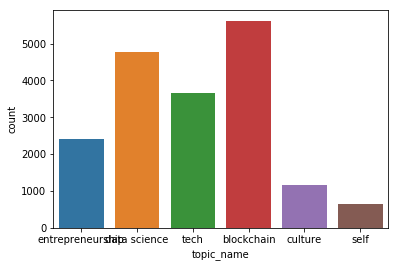

In [276]:
sb.countplot(total['topic_name'])

In [277]:
total['Data']=np.where((total['Tags'].str.contains('ata')),1,0)

In [278]:
total['Data'].value_counts()

0    13214
1     5067
Name: Data, dtype: int64

In [279]:
total['Order']=total['Order'].astype(float).round().astype(int)

In [280]:
total['first']=total[total["Data"]==1].groupby("User")['Order'].transform(max)

In [281]:
total['first_t']=total.groupby(["User",'topic'])['Order'].transform(max)

In [282]:
total[total['User']=='monica pecchia']

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,Date,Claps,follwersa,followinga,ref_count,topic,topic_name,Data,first,first_t
0,Adam Grant,NaN,https://medium.com/@the_economist/what-if-peop...,3,"['Books'],['Entrepreneurship'],['Ideas']",monica pecchia,20,101.60,"Jul 13, 2018",0,...,"Oct 15, 2015",1000.0,0.0,0.0,8,4,entrepreneurship,0,NaN,3
1,Maurizio Nasi,NaN,https://medium.com/@the_economist/what-if-peop...,2,"['Running'],['Maratona'],['Corsa']",monica pecchia,0,86.71,"Jul 13, 2018",0,...,"Feb 3, 2016",4.0,216.0,361.0,5,1,data science,0,NaN,2
2,The Economist,NaN,https://medium.com/@the_economist/what-if-peop...,0,"['Artificial Intelligence'],['Data'],['Technol...",monica pecchia,1,82.83,"Jul 13, 2018",0,...,"Jul 11, 2018",203.0,330000.0,36.0,0,2,tech,1,0.0,0


In [283]:
total['first']=total['first'].fillna(0)

In [284]:
total['first']=total['first'].astype(float).round().astype(int)

In [285]:
total['tot_data'] = total.groupby("User")['Data'].transform(sum)

In [286]:
total['tot_topic'] = total.groupby(["User",'topic'])['Data'].transform(len)

In [287]:
total.head()

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,follwersa,followinga,ref_count,topic,topic_name,Data,first,first_t,tot_data,tot_topic
0,Adam Grant,NaN,https://medium.com/@the_economist/what-if-peop...,3,"['Books'],['Entrepreneurship'],['Ideas']",monica pecchia,20,101.600000,"Jul 13, 2018",0,...,0.0,0.0,8,4,entrepreneurship,0,0,3,1,1
1,Maurizio Nasi,NaN,https://medium.com/@the_economist/what-if-peop...,2,"['Running'],['Maratona'],['Corsa']",monica pecchia,0,86.710000,"Jul 13, 2018",0,...,216.0,361.0,5,1,data science,0,0,2,1,1
2,The Economist,NaN,https://medium.com/@the_economist/what-if-peop...,0,"['Artificial Intelligence'],['Data'],['Technol...",monica pecchia,1,82.830000,"Jul 13, 2018",0,...,330000.0,36.0,0,2,tech,1,0,0,1,1
3,Yogesh B,NaN,https://medium.com/s/trustissues/find-out-what...,10,"['Hci'],['User Experience'],['Usability']",Rishi Shah,12,112.908571,"Jul 13, 2018",0,...,431.0,939.0,26,2,tech,0,0,10,2,8
4,nan,NaN,https://medium.com/s/trustissues/find-out-what...,0,NaN,Jeroen Pijpker,0,-47.990000,"Jul 13, 2018",1,...,0.0,0.0,22,0,blockchain,1,1,1,2,2


In [288]:
total[total['User']=='Rishi Shah']

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,follwersa,followinga,ref_count,topic,topic_name,Data,first,first_t,tot_data,tot_topic
3,Yogesh B,NaN,https://medium.com/s/trustissues/find-out-what...,10,"['Hci'],['User Experience'],['Usability']",Rishi Shah,12,112.908571,"Jul 13, 2018",0,...,431.0,939.0,26,2,tech,0,0,10,2,8
5,Jon Moore,NaN,https://medium.com/s/trustissues/find-out-what...,7,"['Design'],['Product Design'],['Design Thinkin...",Rishi Shah,16,111.582000,"Jul 13, 2018",0,...,20000.0,112.0,8,2,tech,0,0,10,2,8
6739,Riel M,https://www.medium.com/p/7f814e71d34c?source=u...,NaN,1,"['Design'],['Sketchapp'],['UI'],['UX'],['Respo...",Rishi Shah,2,83.145000,"Jul 16, 2018",0,...,0.0,0.0,1,2,tech,0,0,10,2,8
6740,nan,https://www.medium.com/p/94314c8d95a2?source=u...,NaN,3,NaN,Rishi Shah,0,94.490000,"Jul 16, 2018",1,...,0.0,0.0,5,0,blockchain,1,5,5,2,2
6741,Jake Turner,https://www.medium.com/p/6ef988f303d3?source=u...,NaN,4,"['Sketch'],['Plugins'],['Workflow'],['User Exp...",Rishi Shah,0,94.490000,"Jul 16, 2018",0,...,0.0,0.0,0,2,tech,0,0,10,2,8
6742,Vinicius Pineschi,https://www.medium.com/p/69f438b04ae5?source=u...,NaN,5,NaN,Rishi Shah,0,51.090000,"Jul 16, 2018",1,...,153.0,161.0,8,0,blockchain,1,5,5,2,2
6743,Issara Willenskomer,https://www.medium.com/p/a87a4584ddc?source=us...,NaN,6,"['Design'],['Animation'],['UX'],['Usability'],...",Rishi Shah,25,86.134062,"Jul 16, 2018",0,...,9000.0,168.0,9,3,self,0,0,6,2,1
6745,Jon Moore,https://www.medium.com/p/ae7e1714527e?source=u...,NaN,7,"['Design'],['Product Design'],['Design Thinkin...",Rishi Shah,16,111.582000,"Jul 16, 2018",0,...,20000.0,112.0,8,2,tech,0,0,10,2,8
6746,Tubik Studio,https://www.medium.com/p/682fdb9c65bc?source=u...,NaN,8,"['UX'],['UI'],['User Experience'],['Design'],[...",Rishi Shah,2,58.370000,"Jul 16, 2018",0,...,0.0,0.0,13,2,tech,0,0,10,2,8
6747,Riel M,https://www.medium.com/p/79fcf22c88a3?source=u...,NaN,9,"['Design'],['User Experience'],['User Interfac...",Rishi Shah,0,79.520000,"Jul 16, 2018",0,...,0.0,0.0,2,2,tech,0,0,10,2,8


In [289]:
total['success']=np.where((total['first_t']==total['Order'])&(total['tot_topic']>1),1,0)

In [290]:
total['success'].value_counts()

0    14633
1     3648
Name: success, dtype: int64

In [291]:
t_dist = total.pivot_table(index = 'User',values = 'topic',aggfunc = (lambda x: x.mode().iat[0],len,max,min))

In [292]:
t_dist.head()

,<lambda>,len,max,min
User,,,,
0003 xacsong0003,0,1,0,0
3rd Eye Advisory Ltd,1,8,4,0
@coregameHD,3,1,3,3
A W Videos,0,16,2,0
A.H.H,1,18,3,1


In [293]:
t_dist.columns = ['t_mode','t_count','t_max','t_min']

In [294]:
total = total.merge(t_dist, left_on = 'User', right_index = True)

In [295]:
var = pd.DataFrame(total.groupby('User')['topic'].nunique())

In [296]:
var.columns = ['t_unique']

In [297]:
total = total.merge(var, left_on = 'User',right_index = True)

In [298]:
total.head()

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,first,first_t,tot_data,tot_topic,success,t_mode,t_count,t_max,t_min,t_unique
0,Adam Grant,NaN,https://medium.com/@the_economist/what-if-peop...,3,"['Books'],['Entrepreneurship'],['Ideas']",monica pecchia,20,101.600000,"Jul 13, 2018",0,...,0,3,1,1,0,1,3,4,1,3
1,Maurizio Nasi,NaN,https://medium.com/@the_economist/what-if-peop...,2,"['Running'],['Maratona'],['Corsa']",monica pecchia,0,86.710000,"Jul 13, 2018",0,...,0,2,1,1,0,1,3,4,1,3
2,The Economist,NaN,https://medium.com/@the_economist/what-if-peop...,0,"['Artificial Intelligence'],['Data'],['Technol...",monica pecchia,1,82.830000,"Jul 13, 2018",0,...,0,0,1,1,0,1,3,4,1,3
3,Yogesh B,NaN,https://medium.com/s/trustissues/find-out-what...,10,"['Hci'],['User Experience'],['Usability']",Rishi Shah,12,112.908571,"Jul 13, 2018",0,...,0,10,2,8,1,2,11,3,0,3
5,Jon Moore,NaN,https://medium.com/s/trustissues/find-out-what...,7,"['Design'],['Product Design'],['Design Thinkin...",Rishi Shah,16,111.582000,"Jul 13, 2018",0,...,0,10,2,8,0,2,11,3,0,3


In [299]:
a_vars = pd.DataFrame(total.groupby('User')['Author'].nunique())

In [300]:
a_vars.columns = ['author_count']

In [301]:
total = total.merge(a_vars, left_on = 'User',right_index = True)

In [302]:
total.columns

Index(['Author', 'Link', 'Link_a', 'Order', 'Tags', 'User', 'comments',
       'complex', 'data_parsed', 'featured', 'figures', 'link', 'ordera',
       'refs', 'sent', 'words', 'url', 'Title', 'title', 'language', 'Date',
       'Claps', 'follwersa', 'followinga', 'ref_count', 'topic', 'topic_name',
       'Data', 'first', 'first_t', 'tot_data', 'tot_topic', 'success',
       't_mode', 't_count', 't_max', 't_min', 't_unique', 'author_count'],
      dtype='object')

In [303]:
cleaned = total[total['Tags'].isnull()==False]

In [304]:
cleaned['topic_loyalty']=cleaned['t_count']/cleaned['t_unique']

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [305]:
cleaned['author_loyalty']=cleaned['t_count']/cleaned['author_count']

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


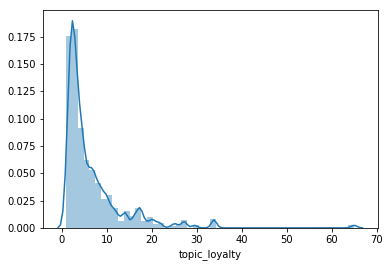

In [306]:
sb.distplot(cleaned['topic_loyalty'])

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


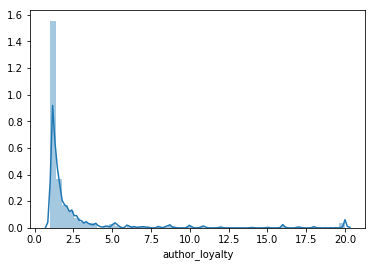

In [307]:
sb.distplot(cleaned['author_loyalty'])

In [308]:
cleaned.sort_values(by = 'author_loyalty',ascending = False).head(25)

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,tot_topic,success,t_mode,t_count,t_max,t_min,t_unique,author_count,topic_loyalty,author_loyalty
12763,PlayBets,NaN,NaN,4,"['Blockchain'],['ICO'],['Gambling'],['Ethereum...",charlottehu0504,0,67.080,"Jul 21, 2018",0,...,18,0,0,20,3,0,2,1,10.0,20.0
12926,Peer Mountain,NaN,NaN,6,"['Blockchain'],['ICO'],['Cryptocurrency'],['Et...",nesrin ner,0,45.255,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0
11991,Peer Mountain,NaN,NaN,10,"['Blockchain'],['Tech'],['ICO'],['Ethereum'],[...",nesrin ner,0,76.300,"Jul 21, 2018",0,...,20,1,0,20,0,0,1,1,20.0,20.0
11992,Peer Mountain,NaN,NaN,9,['Blockchain'],nesrin ner,2,105.320,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0
11993,Peer Mountain,NaN,NaN,8,"['Blockchain'],['ICO'],['Cryptocurrency'],['Et...",nesrin ner,0,55.780,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0
11994,Peer Mountain,NaN,NaN,6,"['Blockchain'],['ICO'],['Cryptocurrency'],['Et...",nesrin ner,0,45.255,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0
11995,Peer Mountain,NaN,NaN,5,"['Blockchain'],['ICO'],['Identity Management']...",nesrin ner,4,87.720,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0
11996,Peer Mountain,NaN,NaN,7,"['Blockchain'],['Cryptocurrency'],['Technology...",nesrin ner,0,NaN,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0
11997,Peer Mountain,NaN,NaN,3,"['Blockchain'],['ICO'],['Cryptocurrency'],['Et...",nesrin ner,3,90.770,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0
12003,Peer Mountain,NaN,NaN,4,"['Blockchain'],['ICO'],['Cryptocurrency'],['Et...",nesrin ner,9,71.820,"Jul 21, 2018",0,...,20,0,0,20,0,0,1,1,20.0,20.0


In [309]:
cleaned.shape

(17033, 41)

In [310]:
total.shape

(18281, 39)

In [311]:
arts_per_user = cleaned.groupby('User')['Order'].max()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


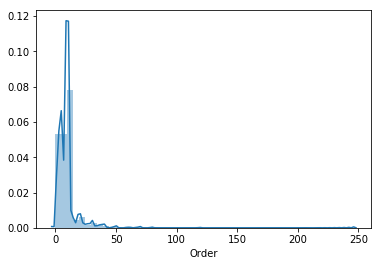

In [312]:
sb.distplot(arts_per_user)

In [313]:
len(arts_per_user)

1992

In [314]:
arts_per_user.mean()

9.21987951807229

In [315]:
cleaned.sort_values(by = 'author_loyalty')

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,tot_topic,success,t_mode,t_count,t_max,t_min,t_unique,author_count,topic_loyalty,author_loyalty
0,Adam Grant,NaN,https://medium.com/@the_economist/what-if-peop...,3,"['Books'],['Entrepreneurship'],['Ideas']",monica pecchia,20,101.600000,"Jul 13, 2018",0,...,1,0,1,3,4,1,3,3,1.000000,1.0
5204,Richard Reis,NaN,https://medium.com/civis-analytics/the-best-ma...,1,"['Programming'],['Life Lessons'],['Tech'],['We...",Andrew Smith,24,112.398800,"Jul 11, 2018",0,...,2,0,2,3,5,2,2,3,1.500000,1.0
5203,Tubik Studio,NaN,https://medium.com/civis-analytics/the-best-ma...,2,"['UX'],['UI'],['Mobile'],['Design'],['User Exp...",Mohammadreza Qorbany,6,54.050000,"Jul 11, 2018",0,...,1,0,0,2,2,0,2,2,1.000000,1.0
5202,Kitfox Games,NaN,https://medium.com/civis-analytics/the-best-ma...,2,"['Gaming'],['Game Development'],['Games'],['In...",Mohammadreza Qorbany,1,97.510000,"Jul 11, 2018",0,...,1,0,0,2,2,0,2,2,1.000000,1.0
5198,RC,NaN,https://medium.com/civis-analytics/the-best-ma...,3,"['JavaScript'],['HTML'],['ES6']",Andrew J. Zimmer,4,91.216667,"Jul 11, 2018",0,...,2,0,5,2,5,5,1,2,2.000000,1.0
5197,Nader Dabit,NaN,https://medium.com/civis-analytics/the-best-ma...,4,"['Redux'],['React'],['React Native'],['JavaScr...",Andrew J. Zimmer,13,96.720714,"Jul 11, 2018",0,...,2,1,5,2,5,5,1,2,2.000000,1.0
5196,Sky,NaN,https://medium.com/civis-analytics/the-best-ma...,3,"['Slack'],['Startup'],['Technology']",Tom Wolfsk√§mpf,27,98.650000,"Jul 11, 2018",0,...,1,0,4,1,4,4,1,1,1.000000,1.0
5194,Sam Jadallah,NaN,https://medium.com/civis-analytics/the-best-ma...,2,"['Hardware'],['Venture Capital'],['Entrepreneu...",Scott R. Schechner,29,88.821250,"Jul 11, 2018",0,...,1,0,1,2,2,1,2,2,1.000000,1.0
5193,M.G. Siegler,NaN,https://medium.com/civis-analytics/the-best-ma...,5,"['Apple'],['Tech'],['iPhone'],['iPhone 8'],['I...",Scott R. Schechner,37,91.827917,"Jul 11, 2018",0,...,1,0,1,2,2,1,2,2,1.000000,1.0
5192,Alex Schult,NaN,https://medium.com/civis-analytics/the-best-ma...,2,"['Photography'],['Cameras'],['Travel'],['Lands...",Nick Orr,11,51.860000,"Jul 11, 2018",0,...,1,0,2,2,3,2,2,2,1.000000,1.0


In [316]:
cleaned['tl_log']=cleaned['topic_loyalty'].apply(np.log)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


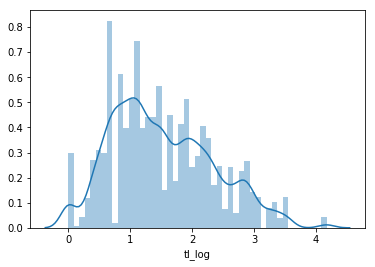

In [317]:
sb.distplot(cleaned['tl_log'])

In [318]:
cleaned['al_log']=cleaned['author_loyalty'].apply(np.log)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


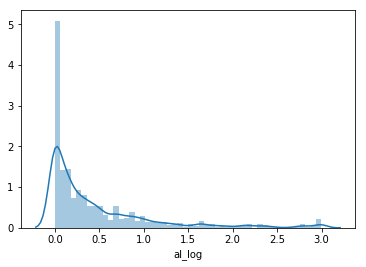

In [319]:
sb.distplot(cleaned['al_log'])

In [320]:
def get_ref_domains(ref):
    if len(ref)>3:
        domains = []
        ref = ref.replace("[","")
        ref = ref.replace("]","")
        ref = ref.split(",")
        for r in ref:
            #print(r)
            out = r.split("//")[-1].split("/")[0]
            domains.append(out)
        return domains
    else:
        return 0

In [321]:
cleaned['ref_domains']=cleaned['refs'].apply(get_ref_domains)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [322]:
def most_common(lst):
    try:
        return max(set(lst), key=lst.count)
    except:
        return ''

In [323]:
most_common(cleaned['ref_domains'][1])

'www.valenciaciudaddelrunning.com'

In [324]:
cleaned['top_ref']=cleaned['ref_domains'].apply(most_common)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [325]:
cleaned.head()

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,t_max,t_min,t_unique,author_count,topic_loyalty,author_loyalty,tl_log,al_log,ref_domains,top_ref
0,Adam Grant,NaN,https://medium.com/@the_economist/what-if-peop...,3,"['Books'],['Entrepreneurship'],['Ideas']",monica pecchia,20,101.600000,"Jul 13, 2018",0,...,4,1,3,3,1.000000,1.000,0.000000,0.000000,"[www.amazon.com, www.amazon.com, www.theguardi...",www.amazon.com
1,Maurizio Nasi,NaN,https://medium.com/@the_economist/what-if-peop...,2,"['Running'],['Maratona'],['Corsa']",monica pecchia,0,86.710000,"Jul 13, 2018",0,...,4,1,3,3,1.000000,1.000,0.000000,0.000000,"[www.marathoncenter.it, www.valenciaciudaddelr...",www.valenciaciudaddelrunning.com
2,The Economist,NaN,https://medium.com/@the_economist/what-if-peop...,0,"['Artificial Intelligence'],['Data'],['Technol...",monica pecchia,1,82.830000,"Jul 13, 2018",0,...,4,1,3,3,1.000000,1.000,0.000000,0.000000,0,
3,Yogesh B,NaN,https://medium.com/s/trustissues/find-out-what...,10,"['Hci'],['User Experience'],['Usability']",Rishi Shah,12,112.908571,"Jul 13, 2018",0,...,3,0,3,8,3.666667,1.375,1.299283,0.318454,"[thehipperelement.com, www.coursera.org, 52wee...",www.udemy.com
5,Jon Moore,NaN,https://medium.com/s/trustissues/find-out-what...,7,"['Design'],['Product Design'],['Design Thinkin...",Rishi Shah,16,111.582000,"Jul 13, 2018",0,...,3,0,3,8,3.666667,1.375,1.299283,0.318454,"[www.colormatters.com, uxtools.co, dribbble.co...",medium.com


In [326]:
cleaned['top_ref'].value_counts()

medium.com                      2162
                                2042
github.com                      1059
en.wikipedia.org                1008
twitter.com                      385
www.amazon.com                   346
arxiv.org                        260
www.linkedin.com                 199
www.youtube.com                  143
t.me                             140
amzn.to                          135
towardsdatascience.com           132
blog.enigma.co                   115
trigid.org'                      105
www.kaggle.com                   103
www.jotform.com                   97
medium.freecodecamp.org           93
goo.gl                            90
www.peermountain.com              70
bit.ly                            68
www.facebook.com                  68
www.designluck.com                67
scikit-learn.org                  64
etherscan.io                      64
www.reddit.com                    62
timdenning.net                    60
www.inc.com                       58
i

In [327]:
cleaned.dtypes

Author             object
Link               object
Link_a             object
Order               int64
Tags               object
User               object
comments            int64
complex           float64
data_parsed        object
featured            int64
figures             int64
link               object
ordera            float64
refs               object
sent              float64
words               int64
url                object
Title              object
title              object
language           object
Date               object
Claps             float64
follwersa         float64
followinga        float64
ref_count           int64
topic               int64
topic_name         object
Data                int64
first               int64
first_t             int64
tot_data            int64
tot_topic           int64
success             int64
t_mode              int64
t_count             int64
t_max               int64
t_min               int64
t_unique            int64
author_count

In [328]:
cleaned['date']=pd.to_datetime(cleaned['Date'])

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [329]:
cleaned=cleaned.drop('Date',axis = 1)

In [330]:
cleaned['data_parsed']=pd.to_datetime(cleaned['data_parsed'])

In [331]:
cleaned.columns

Index(['Author', 'Link', 'Link_a', 'Order', 'Tags', 'User', 'comments',
       'complex', 'data_parsed', 'featured', 'figures', 'link', 'ordera',
       'refs', 'sent', 'words', 'url', 'Title', 'title', 'language', 'Claps',
       'follwersa', 'followinga', 'ref_count', 'topic', 'topic_name', 'Data',
       'first', 'first_t', 'tot_data', 'tot_topic', 'success', 't_mode',
       't_count', 't_max', 't_min', 't_unique', 'author_count',
       'topic_loyalty', 'author_loyalty', 'tl_log', 'al_log', 'ref_domains',
       'top_ref', 'date'],
      dtype='object')

In [332]:
cleaned['date'][0]

Timestamp('2015-10-15 00:00:00')

In [333]:
cleaned['data_parsed'][0]

Timestamp('2018-07-13 00:00:00')

In [334]:
(cleaned['data_parsed'][0]-cleaned['date'][0]).days

1002

In [335]:
cleaned['days_open']=(cleaned['data_parsed']-cleaned['date'])

In [336]:
cleaned['days_open']=cleaned['days_open'].dt.days

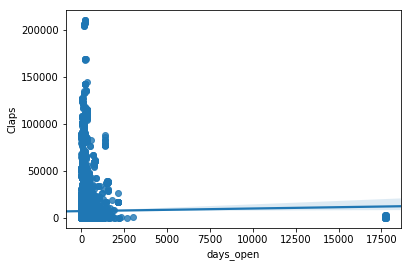

In [337]:
sb.regplot(data = cleaned, x = 'days_open',y='Claps')

In [338]:
cleaned.columns

Index(['Author', 'Link', 'Link_a', 'Order', 'Tags', 'User', 'comments',
       'complex', 'data_parsed', 'featured', 'figures', 'link', 'ordera',
       'refs', 'sent', 'words', 'url', 'Title', 'title', 'language', 'Claps',
       'follwersa', 'followinga', 'ref_count', 'topic', 'topic_name', 'Data',
       'first', 'first_t', 'tot_data', 'tot_topic', 'success', 't_mode',
       't_count', 't_max', 't_min', 't_unique', 'author_count',
       'topic_loyalty', 'author_loyalty', 'tl_log', 'al_log', 'ref_domains',
       'top_ref', 'date', 'days_open'],
      dtype='object')

In [339]:
cleaned.to_csv('all_data.csv')

In [189]:
def get_sentiment(title):
    return TextBlob(title).sentiment.polarity

In [190]:
cleaned['title_sent']=cleaned['title'].apply(get_sentiment)

In [191]:
articles=cleaned[['title','Author','Tags','comments','complex','Claps','figures','refs','sent','words','title_sent','follwersa','followinga','ref_count','topic','topic_name','topic_loyalty','author_loyalty',
                  'tl_log','al_log','ref_domains','days_open','success']]

In [192]:
articles_pt = pd.pivot_table(articles,index = ['title','Author'],values = ['topic','comments','Claps','complex','figures','sent','words','title_sent','follwersa','followinga','ref_count','topic_loyalty','author_loyalty',
                  'tl_log','al_log','days_open','success'],aggfunc = [np.mean,max,len])

In [193]:
articles_pt.head()

mean                                      \
                                Claps    al_log author_loyalty   comments   
title Author                                                                
                           512.111111  0.514641       1.780447   1.555556   
                           133.000000  0.510826       1.666667   3.000000   
       (Shinichiro Hori)   169.000000  0.251314       1.285714   0.000000   
       Sabrina Cheng      2900.000000  0.000000       1.000000  15.000000   
       Watin               599.250000  1.029619       2.800000   1.250000   

                                                                       \
                             complex   days_open   figures followinga   
title Author                                                            
                          120.505278   72.222222  4.111111      209.0   
                          143.317143    3.000000  1.000000       65.0   
       (Shinichiro Hori)  162.510000  200.000000  4.000000      482.0   
       Sabrina Cheng      151.313333   41.000000  5.000000       56.0   
       Watin              125.274500    5.000000  5.500000      840.5   

                                                 ...         len            \
                            follwersa ref_count  ...  followinga follwersa   
title Author                                     ...                         
                           879.222222  2.666667  ...         9.0       9.0   
                           600.000000  0.000000  ...         1.0       1.0   
       (Shinichiro Hori)  1100.000000  0.000000  ...         1.0       1.0   
       Sabrina Cheng       800.000000  0.000000  ...         1.0       1.0   
       Watin              1500.000000  1.000000  ...         4.0       4.0   

                                                                         \
                         ref_count sent success title_sent tl_log topic   
title Author                                                              
                                 9  9.0       9        9.0    9.0     9   
                                 1  1.0       1        1.0    1.0     1   
       (Shinichiro Hori)         1  1.0       1        1.0    1.0     1   
       Sabrina Cheng             1  1.0       1        1.0    1.0     1   
       Watin                     4  4.0       4        4.0    4.0     4   

                                              
                         topic_loyalty words  
title Author                                  
                                   9.0     9  
                                   1.0     1  
       (Shinichiro Hori)           1.0     1  
       Sabrina Cheng               1.0     1  
       Watin                       4.0     4  

[5 rows x 51 columns]

In [194]:
articles_pt.shape

(9454, 51)

In [195]:
articles_pt.columns

MultiIndex(levels=[['mean', 'max', 'len'], ['Claps', 'al_log', 'author_loyalty', 'comments', 'complex', 'days_open', 'figures', 'followinga', 'follwersa', 'ref_count', 'sent', 'success', 'title_sent', 'tl_log', 'topic', 'topic_loyalty', 'words']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]])

In [196]:
articles_pt.columns=['Claps_avg','al_log_avg', 'author_loyalty_avg', 'comments_avg', 'complex_avg', 'days_open_avg', 'figures_avg',
                     'followinga_avg', 'follwersa_avg', 'ref_count_avg', 'sent_avg', 'success_avg','title_sent_avg','tl_log_avg','topic_avg','topic_loyalty_avg','words_avg',
                    'Claps_max', 'al_log_max', 'author_loyalty_max', 'comments_max', 'complex_max', 'days_open_max', 'figures_max',
                     'followinga_max', 'follwersa_max', 'ref_count_max', 'sent_max', 'success_max','title_sent_max','tl_log_max', 'topic_max','topic_loyalty_max','words_max',
                    'Claps_len', 'al_log_len', 'author_loyalty_len', 'comments_len', 'complex_len', 'days_open_len', 'figures_len',
                     'followinga_len', 'follwersa_len', 'ref_count_len', 'sent_len','success_len','title_sent_len', 'tl_log_len', 'topic_len','topic_loyalty_len','words_len']

In [197]:
articles_pt = articles_pt[['Claps_max','topic_max','al_log_avg','author_loyalty_avg','comments_max','complex_max','days_open_max',
                          'figures_max','followinga_max','follwersa_max','ref_count_max','sent_max','tl_log_avg',
                           'topic_loyalty_avg','success_avg','success_len','words_max','title_sent_max']]

In [198]:
articles_pt.tail()

,,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,followinga_max,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max
title,Author,,,,,,,,,,,,,,,,,,
xVDeployedonKovanFirstAuditBegins,Tom Schmidt,1000.0,0,1.072637,2.923077,2,81.630000,21,0,0.0,0.0,5,0.168182,3.232121,25.333333,0.0,2,30,0.0
xZRXAnalysisDecentralisedExchangeProtocolOnEthereum,Arnav Vohra,419.0,0,1.072637,2.923077,2,118.333333,77,3,0.0,0.0,14,0.362500,3.232121,25.333333,0.0,2,48,0.0
xfasterFlaskapps,Philip Jones,635.0,1,0.054067,1.055556,9,103.140000,238,0,0.0,0.0,13,0.084921,2.433613,11.400000,0.0,1,257,0.0
xgboostHiImGammaWhatcanIdoforyouandthetuningofregularization,Laurae,308.0,1,0.245311,1.283333,6,84.828182,700,0,5.0,557.0,1,0.133333,1.945910,7.000000,0.0,2,440,0.0
xkcdcomArtificialIntelligence,"Daniel Shapiro, PhD",319.0,1,0.083771,1.095238,2,61.383333,4,24,0.0,0.0,16,0.100000,1.172993,3.361111,0.0,3,42,0.0


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


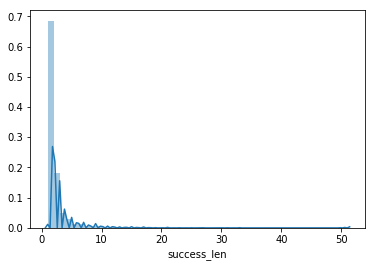

In [199]:
sb.distplot(articles_pt['success_len'])

In [200]:
articles_pt[articles_pt['success_avg']>0]

Claps_max  \
title                                              Author                                          
                                                                                          2200.0   
                                                    (Shinichiro Hori)                      169.0   
                                                    Watin                                  662.0   
                                                   -gipi                                   250.0   
                                                   Bryan Yang                               40.0   
                                                   Ddio                                    869.0   
                                                   Dez                                     332.0   
                                                   Dovydas Reinikevicius                 21000.0   
                                                   Eugene Chang ()                         160.0   
                                                   Evonne Tsai                            2900.0   
                                                   Fred Jame                                48.0   
                                                   Jeromy-Yu von                           443.0   
                                                   Joel Fukuzawa                           498.0   
                                                   Joris Wu                                  2.0   
                                                   Livia Yang                              986.0   
                                                   Not about code                          527.0   
                                                   Samuel                                 2300.0   
                                                   Seetharaman Gr                          192.0   
                                                   Tom Lin                                 104.0   
                                                   Waves Platform                          284.0   
                                                   _                                      1100.0   
                                                   rudileung                               144.0   
AATFandcannabiswhatisincommon                      Agro Tech Farm                          105.0   
ABCAlwaysBeCoding                                  David Byttow                           8300.0   
ABeginnersGuidetoDataEngineeringPartI              Robert Chang                          11300.0   
ABeginnersGuidetoKubernetes                        Imesh Gunaratne                         102.0   
ABeginnersGuidetowritingaKickassREADME             Akash Nimare                            499.0   
ABitterGuideToOpenSource                           Ken Wheeler                           14800.0   
ABriefHistoryoftheFuture                           James Altucher                         1500.0   
ABriefOverviewofESforReactNativeDevelopers         Spencer Carli                          2100.0   
...                                                                                          ...   
nan                                                War Is Boring                          1800.0   
                                                   Whitney Meers                         38000.0   
                                                   Yann Girard                             179.0   
                                                   Yogesh B                                264.0   
                                                   Yotam Kadishay                        11700.0   
                                                   Yves Mulkers                             48.0   
                                                   Zat Rana                              10100.0   
                                                   Zdravko Cvijetic                    

In [145]:
articles_pt.shape

(9454, 18)

In [146]:
articles_pt.success_len.value_counts()

1     6477
2     1711
3      453
4      291
5      119
6      107
7       53
8       51
9       45
10      32
12      22
11      17
15      11
14      11
13      10
17       9
16       7
18       5
21       5
20       2
19       2
33       2
32       1
25       1
24       1
31       1
26       1
23       1
51       1
29       1
22       1
30       1
46       1
27       1
Name: success_len, dtype: int64

In [201]:
ubase = articles_pt[articles_pt['success_len']>=10]

In [202]:
ubase.shape

(147, 18)

In [149]:
ubase.head()

,,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,followinga_max,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max
title,Author,,,,,,,,,,,,,,,,,,
,Dovydas Reinikevicius,21000.0,0,0.819386,2.400722,19,97.200000,62,1,1.0,2400.0,0,0.484110,2.425349,12.791667,0.083333,12,74,0.0
ACompleteMachineLearningProjectWalkThroughinPythonPartOne,William Koehrsen,8900.0,1,0.204970,1.251257,14,87.352727,68,13,0.0,0.0,23,0.076845,1.429189,5.515385,0.153846,13,278,0.0
ACryptocoinYouWanttoSpend,REMECoin.io,7600.0,0,1.752779,7.000000,1,81.460000,171,2,1.0,1000.0,6,0.000000,1.379545,4.384615,0.461538,13,47,0.0
AFeatureSelectionToolforMachineLearninginPython,William Koehrsen,3600.0,1,0.122830,1.143520,13,75.483333,31,11,0.0,0.0,13,0.326617,1.300244,4.500000,0.176471,17,230,0.0
AGuidetoBecomingaFullStackDeveloperin,Daniel Borowski,48000.0,5,0.527692,1.938571,25,89.186667,478,10,427.0,11400.0,14,0.254243,1.329968,4.358333,0.600000,10,53,0.0


In [150]:
ubase.head()

,,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,followinga_max,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max
title,Author,,,,,,,,,,,,,,,,,,
,Dovydas Reinikevicius,21000.0,0,0.819386,2.400722,19,97.200000,62,1,1.0,2400.0,0,0.484110,2.425349,12.791667,0.083333,12,74,0.0
ACompleteMachineLearningProjectWalkThroughinPythonPartOne,William Koehrsen,8900.0,1,0.204970,1.251257,14,87.352727,68,13,0.0,0.0,23,0.076845,1.429189,5.515385,0.153846,13,278,0.0
ACryptocoinYouWanttoSpend,REMECoin.io,7600.0,0,1.752779,7.000000,1,81.460000,171,2,1.0,1000.0,6,0.000000,1.379545,4.384615,0.461538,13,47,0.0
AFeatureSelectionToolforMachineLearninginPython,William Koehrsen,3600.0,1,0.122830,1.143520,13,75.483333,31,11,0.0,0.0,13,0.326617,1.300244,4.500000,0.176471,17,230,0.0
AGuidetoBecomingaFullStackDeveloperin,Daniel Borowski,48000.0,5,0.527692,1.938571,25,89.186667,478,10,427.0,11400.0,14,0.254243,1.329968,4.358333,0.600000,10,53,0.0


In [151]:
datas = articles_pt[articles_pt['topic_max']==1]

In [152]:
datas.shape

(2393, 18)

In [153]:
datas.head()

Claps_max  topic_max  al_log_avg  author_loyalty_avg  \
title Author                                                                  
      Elaine H.Y Wu         39.0          1    0.435318            1.545455   
      Eugene Chang ()      160.0          1    0.510826            1.666667   
      Maxime Coutt        5400.0          1    0.470004            1.600000   
      Yao-Jen Kuo          100.0          1    0.356675            1.428571   
      ppp                   32.0          1    0.117783            1.125000   

                       comments_max  complex_max  days_open_max  figures_max  \
title Author                                                                   
      Elaine H.Y Wu               0    136.49250              9            3   
      Eugene Chang ()             7     96.87875             73           10   
      Maxime Coutt                7     99.05700            209            2   
      Yao-Jen Kuo                 0     65.21500             25           77   
      ppp                         0     87.59600             20           18   

                       followinga_max  follwersa_max  ref_count_max  sent_max  \
title Author                                                                    
      Elaine H.Y Wu              43.0           45.0              0       NaN   
      Eugene Chang ()            84.0          153.0              2  0.000000   
      Maxime Coutt                0.0            0.0              4  0.479762   
      Yao-Jen Kuo                98.0          727.0              1       NaN   
      ppp                         1.0           13.0             12       NaN   

                       tl_log_avg  topic_loyalty_avg  success_avg  \
title Author                                                        
      Elaine H.Y Wu      1.446919           4.250000          0.0   
      Eugene Chang ()    0.916291           2.500000          1.0   
      Maxime Coutt       0.980829           2.666667          0.0   
      Yao-Jen Kuo        0.693147           2.000000          0.0   
      ppp                2.197225           9.000000          0.0   

                       success_len  words_max  title_sent_max  
title Author                                                   
      Elaine H.Y Wu              1         12             0.0  
      Eugene Chang ()            1         19             0.0  
      Maxime Coutt               1        292             0.0  
      Yao-Jen Kuo                2          7             0.0  
      ppp                        1         71             0.0

In [154]:
cleaned.columns

Index(['Author', 'Link', 'Link_a', 'Order', 'Tags', 'User', 'comments',
       'complex', 'data_parsed', 'featured', 'figures', 'link', 'ordera',
       'refs', 'sent', 'words', 'url', 'Title', 'title', 'language', 'Claps',
       'follwersa', 'followinga', 'ref_count', 'topic', 'topic_name', 'Data',
       'first', 'first_t', 'tot_data', 'tot_topic', 'success', 't_mode',
       't_count', 't_max', 't_min', 't_unique', 'author_count',
       'topic_loyalty', 'author_loyalty', 'tl_log', 'al_log', 'ref_domains',
       'top_ref', 'date', 'days_open', 'title_sent'],
      dtype='object')

In [155]:
df = cleaned[['Author','title','top_ref']]


In [156]:
datas = datas.merge(df,left_on = ['title','Author'],right_on = ['title','Author'],how = 'left')

In [157]:
datas.columns

Index(['title', 'Author', 'Claps_max', 'topic_max', 'al_log_avg',
       'author_loyalty_avg', 'comments_max', 'complex_max', 'days_open_max',
       'figures_max', 'followinga_max', 'follwersa_max', 'ref_count_max',
       'sent_max', 'tl_log_avg', 'topic_loyalty_avg', 'success_avg',
       'success_len', 'words_max', 'title_sent_max', 'top_ref'],
      dtype='object')

In [158]:
datas.head(10)

,title,Author,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,...,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max,top_ref
0,,Elaine H.Y Wu,39.0,1,0.435318,1.545455,0,136.49250,9,3,...,45.0,0,NaN,1.446919,4.250000,0.0,1,12,0.0,
1,,Eugene Chang (),160.0,1,0.510826,1.666667,7,96.87875,73,10,...,153.0,2,0.000000,0.916291,2.500000,1.0,1,19,0.0,excel.uservoice.com
2,,Maxime Coutt,5400.0,1,0.470004,1.600000,7,99.05700,209,2,...,0.0,4,0.479762,0.980829,2.666667,0.0,1,292,0.0,github.com
3,,Yao-Jen Kuo,100.0,1,0.356675,1.428571,0,65.21500,25,77,...,727.0,1,NaN,0.693147,2.000000,0.0,2,7,0.0,medium.com
4,,Yao-Jen Kuo,100.0,1,0.356675,1.428571,0,65.21500,25,77,...,727.0,1,NaN,0.693147,2.000000,0.0,2,7,0.0,medium.com
5,,ppp,32.0,1,0.117783,1.125000,0,87.59600,20,18,...,13.0,12,NaN,2.197225,9.000000,0.0,1,71,0.0,github.com
6,ABeginnersGuideonSentimentAnalysiswithRNN,Susan Li,454.0,1,0.069303,1.072917,6,74.52400,51,5,...,0.0,4,0.154167,1.357336,4.933333,0.0,4,35,0.0,en.wikipedia.org
7,ABeginnersGuideonSentimentAnalysiswithRNN,Susan Li,454.0,1,0.069303,1.072917,6,74.52400,51,5,...,0.0,4,0.154167,1.357336,4.933333,0.0,4,35,0.0,en.wikipedia.org
8,ABeginnersGuideonSentimentAnalysiswithRNN,Susan Li,454.0,1,0.069303,1.072917,6,74.52400,51,5,...,0.0,4,0.154167,1.357336,4.933333,0.0,4,35,0.0,en.wikipedia.org
9,ABeginnersGuideonSentimentAnalysiswithRNN,Susan Li,454.0,1,0.069303,1.072917,6,74.52400,51,5,...,0.0,4,0.154167,1.357336,4.933333,0.0,4,35,0.0,en.wikipedia.org


In [159]:
print(datas.shape)
datas = datas.drop_duplicates(subset=['title', 'Author', 'Claps_max', 'al_log_avg', 'author_loyalty_avg',
       'comments_max', 'complex_max', 'days_open_max', 'figures_max',
       'followinga_max', 'follwersa_max', 'ref_count_max', 'sent_max',
       'tl_log_avg', 'topic_max', 'topic_loyalty_avg', 'success_avg',
       'success_len', 'words_max', 'title_sent_max'])
print(datas.shape)

(4736, 21)
(2393, 21)


In [160]:
datas=datas[datas['title']!='nan']

In [161]:
datas.shape

(2302, 21)

In [162]:
datas.to_csv('model_ready.csv')

In [163]:
datas.tail(10)

,title,Author,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,...,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max,top_ref
4718,solarselfsufficiencywithoutyourlandlordnoticing,Niko Dunk,1000.0,1,0.000000,1.000000,29,89.325000,354,23,...,NaN,5,0.196170,0.693147,2.000000,0.000000,1,1007,0.0,renew.org.au
4719,stepsontheroadtoDeepLearningpart,Julien Simon,261.0,1,0.470004,1.600000,0,99.910000,179,2,...,2900.0,7,NaN,2.772589,16.000000,0.000000,1,22,0.0,www.kaggle.com
4720,thingseveryaspiringdatascientistneedstoknow,Ayo Oluleye,2200.0,1,0.427833,1.676471,13,86.283333,160,1,...,0.0,3,0.238389,2.249905,9.500000,0.000000,2,362,0.0,www.kaggle.com
4722,thingsyoushoulddotogetselectedforthendphaseofy...,George Szabo,16200.0,1,0.159858,1.182051,25,98.000769,254,4,...,1100.0,1,0.243329,1.185116,4.250000,0.333333,3,741,0.0,medium.com
4725,tipsforstartingaWordPressblogin,Nile Flores,1.0,1,0.251314,1.285714,0,105.660000,214,6,...,2000.0,28,NaN,1.098612,3.000000,0.000000,1,8,0.0,www.godaddy.com
4726,typesofArtificialNeuralNetworksforNaturalLangu...,Data Monsters,901.0,1,0.079714,1.083333,0,30.880000,300,7,...,1500.0,36,NaN,1.674952,6.950000,0.500000,2,40,0.0,en.wikipedia.org
4728,waystoperformsimplelinearregressionandmeasuret...,Tirthajyoti Sarkar,1300.0,1,0.178337,1.214286,3,58.318000,204,7,...,0.0,16,-0.125000,1.092401,3.000000,0.000000,2,102,0.0,en.wikipedia.org
4730,xfasterFlaskapps,Philip Jones,635.0,1,0.054067,1.055556,9,103.140000,238,0,...,0.0,13,0.084921,2.433613,11.400000,0.000000,1,257,0.0,github.com
4731,xgboostHiImGammaWhatcanIdoforyouandthetuningof...,Laurae,308.0,1,0.245311,1.283333,6,84.828182,700,0,...,557.0,1,0.133333,1.945910,7.000000,0.000000,2,440,0.0,www.kaggle.com
4733,xkcdcomArtificialIntelligence,"Daniel Shapiro, PhD",319.0,1,0.083771,1.095238,2,61.383333,4,24,...,0.0,16,0.100000,1.172993,3.361111,0.000000,3,42,0.0,scikit-learn.org


In [164]:
ubase.head()

,,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,followinga_max,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max
title,Author,,,,,,,,,,,,,,,,,,
,Dovydas Reinikevicius,21000.0,0,0.819386,2.400722,19,97.200000,62,1,1.0,2400.0,0,0.484110,2.425349,12.791667,0.083333,12,74,0.0
ACompleteMachineLearningProjectWalkThroughinPythonPartOne,William Koehrsen,8900.0,1,0.204970,1.251257,14,87.352727,68,13,0.0,0.0,23,0.076845,1.429189,5.515385,0.153846,13,278,0.0
ACryptocoinYouWanttoSpend,REMECoin.io,7600.0,0,1.752779,7.000000,1,81.460000,171,2,1.0,1000.0,6,0.000000,1.379545,4.384615,0.461538,13,47,0.0
AFeatureSelectionToolforMachineLearninginPython,William Koehrsen,3600.0,1,0.122830,1.143520,13,75.483333,31,11,0.0,0.0,13,0.326617,1.300244,4.500000,0.176471,17,230,0.0
AGuidetoBecomingaFullStackDeveloperin,Daniel Borowski,48000.0,5,0.527692,1.938571,25,89.186667,478,10,427.0,11400.0,14,0.254243,1.329968,4.358333,0.600000,10,53,0.0


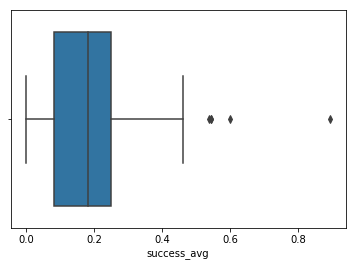

In [165]:
sb.boxplot(ubase['success_avg'])

In [166]:
ubase['success_avg'].value_counts()

0.000000    24
0.200000    15
0.083333     8
0.300000     8
0.333333     6
0.100000     6
0.250000     5
0.166667     5
0.058824     4
0.090909     4
0.363636     4
0.133333     3
0.181818     3
0.272727     3
0.230769     3
0.066667     3
0.222222     3
0.142857     3
0.187500     3
0.545455     2
0.285714     2
0.416667     2
0.214286     2
0.153846     2
0.176471     2
0.461538     1
0.076923     1
0.121212     1
0.062500     1
0.190476     1
0.047619     1
0.125000     1
0.095238     1
0.375000     1
0.428571     1
0.071429     1
0.894737     1
0.242424     1
0.195652     1
0.111111     1
0.307692     1
0.235294     1
0.156863     1
0.263158     1
0.538462     1
0.600000     1
0.193548     1
Name: success_avg, dtype: int64

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


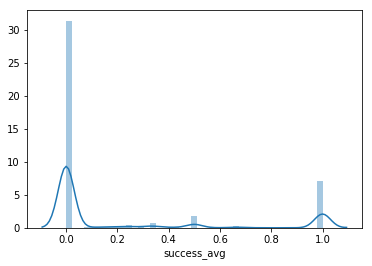

In [167]:
sb.distplot(articles_pt['success_avg'])

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


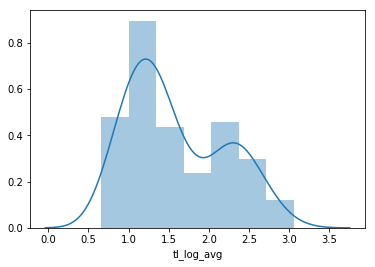

In [168]:
sb.distplot(ubase['tl_log_avg'])

In [169]:
ubase = ubase.merge(df,left_on = ['title','Author'],right_on = ['title','Author'],how = 'left')
ubase=ubase.drop_duplicates()
ubase.shape

(169, 21)

In [170]:
ubase.to_csv('user_base.csv')

In [171]:
datas.shape

(2302, 21)

In [172]:
datas.Author.nunique()

1416

In [173]:
datas.isnull().sum()

title                   0
Author                  0
Claps_max               0
topic_max               0
al_log_avg              0
author_loyalty_avg      0
comments_max            0
complex_max             4
days_open_max           0
figures_max             0
followinga_max         26
follwersa_max          73
ref_count_max           0
sent_max              860
tl_log_avg              0
topic_loyalty_avg       0
success_avg             0
success_len             0
words_max               0
title_sent_max          0
top_ref                 0
dtype: int64

In [174]:
datas.days_open_max.max()

17725

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


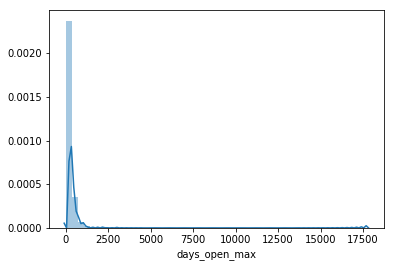

In [175]:
sb.distplot(datas['days_open_max'])

In [176]:
datas.describe()

,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,followinga_max,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max
count,2302.000000,2302.0,2302.000000,2302.000000,2302.000000,2298.000000,2302.000000,2302.000000,2276.000000,2229.000000,2302.000000,1442.000000,2302.000000,2302.000000,2302.000000,2302.00000,2302.000000,2302.0
mean,1354.277585,1.0,0.198543,1.326100,6.081668,80.528794,203.482624,8.131625,195.692004,3087.895020,6.319288,0.259586,1.422373,5.192140,0.194610,1.97437,137.804952,0.0
std,2841.314514,0.0,0.296551,1.107667,11.103219,22.770481,432.001908,8.684511,2323.337483,18344.832175,8.446326,0.196001,0.593973,3.819667,0.353403,2.15778,167.197923,0.0
min,1.000000,1.0,0.000000,1.000000,0.000000,-152.110000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.625000,0.000000,1.000000,0.000000,1.00000,0.000000,0.0
25%,131.250000,1.0,0.000000,1.000000,0.000000,67.925833,50.000000,2.000000,0.000000,0.000000,2.000000,0.129097,1.011601,2.916667,0.000000,1.00000,33.000000,0.0
50%,448.500000,1.0,0.120628,1.129547,2.000000,82.118750,124.000000,6.000000,0.000000,0.000000,4.000000,0.239271,1.386294,4.250000,0.000000,1.00000,77.000000,0.0
75%,1200.000000,1.0,0.255413,1.332800,8.000000,94.660000,257.000000,11.000000,41.000000,506.000000,8.000000,0.368784,1.802695,6.416667,0.250000,2.00000,178.000000,0.0
max,40000.000000,1.0,2.995732,20.000000,233.000000,205.820000,17725.000000,93.000000,85000.000000,330000.000000,177.000000,1.000000,3.521447,33.833333,1.000000,22.00000,1192.000000,0.0


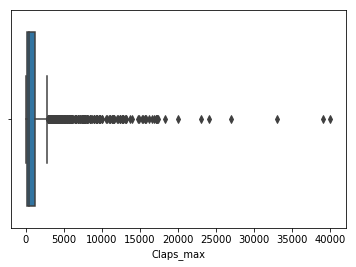

In [177]:
sb.boxplot(datas['Claps_max'])

In [178]:
datas[datas['Claps_max']>35000]

,title,Author,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,...,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max,top_ref
379,ArtificialIntelligenceTheRevolutionHasntHappen...,Michael Jordan,40000.0,1,0.138986,1.173631,24,67.25000,95,1,...,5600.0,0,0.143132,1.112121,3.388889,0.333333,18,125,0.0,
2470,MachineLearningisFun,Adam Geitgey,39000.0,1,0.186364,1.235344,44,92.81375,1540,12,...,35000.0,15,0.347124,1.111124,3.879167,0.083333,12,698,0.0,en.wikipedia.org


In [179]:
pt = pd.pivot_table(data = datas, index = 'Author',values = 'Claps_max', aggfunc = (sum,np.mean,len))

In [180]:
pt.head()

,len,mean,sum
Author,,,
,1.0,100.0,100.0
Steeve Huang,5.0,1280.2,6401.0
Watin,1.0,242.0,242.0
Zaou,1.0,105.0,105.0
13D Research,1.0,86.0,86.0


In [181]:
pt.columns = ['count','avg','total']

In [182]:
temp = pt.sort_values(by = 'avg',ascending = False).head(20)

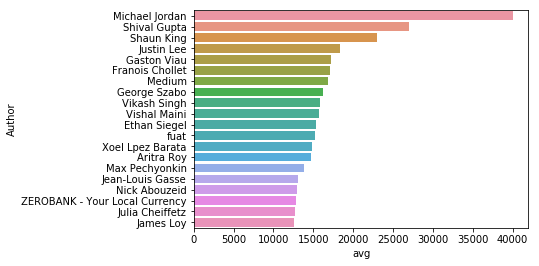

In [183]:
sb.barplot(data = temp,y = temp.index,x = 'avg')

In [184]:
temp = datas.sort_values(by = 'Claps_max',ascending = False).head(20)

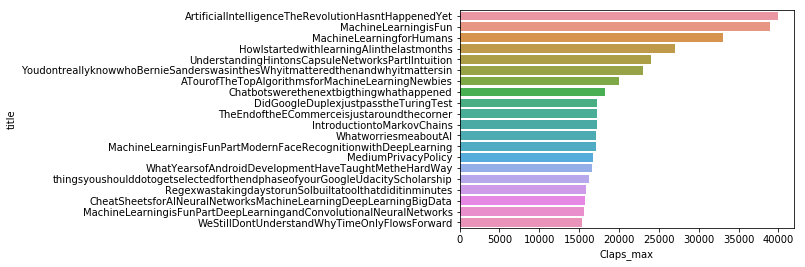

In [185]:
sb.barplot(data = temp, y = 'title',x = 'Claps_max')

In [186]:
total[['title','Author']].nunique()

title     9367
Author    5442
dtype: int64

In [187]:
total[total['title']=='nan']

,Author,Link,Link_a,Order,Tags,User,comments,complex,data_parsed,featured,...,first_t,tot_data,tot_topic,success,t_mode,t_count,t_max,t_min,t_unique,author_count
3,Yogesh B,NaN,https://medium.com/s/trustissues/find-out-what...,10,"['Hci'],['User Experience'],['Usability']",Rishi Shah,12,112.908571,"Jul 13, 2018",0,...,10,2,8,1,2,11,3,0,3,8
6742,Vinicius Pineschi,https://www.medium.com/p/69f438b04ae5?source=u...,NaN,5,NaN,Rishi Shah,0,51.090000,"Jul 16, 2018",1,...,5,2,2,1,2,11,3,0,3,8
6748,Yogesh B,https://www.medium.com/p/7f65770b33de?source=u...,NaN,10,"['Hci'],['User Experience'],['Usability']",Rishi Shah,12,112.908571,"Jul 16, 2018",0,...,10,2,8,1,2,11,3,0,3,8
4,nan,NaN,https://medium.com/s/trustissues/find-out-what...,0,NaN,Jeroen Pijpker,0,-47.990000,"Jul 13, 2018",1,...,1,2,2,0,0,2,0,0,1,2
342,CPChain,NaN,https://medium.com/@cpchain/cpchain-technical-...,9,"['Blockchain'],['Traffic Safety'],['Intellieng...",eazycrypto,0,66.320000,"Jul 13, 2018",0,...,10,2,9,0,0,10,3,0,2,3
345,CPChain,NaN,https://medium.com/@cpchain/cpchain-technical-...,6,['Logo Design'],eazycrypto,0,49.150000,"Jul 13, 2018",0,...,6,2,1,0,0,10,3,0,2,3
338,Ortal Avraham,NaN,https://medium.com/s/trustissues/find-out-what...,7,"['Comics'],['Therapy'],['Ortal Avraham'],['Men...",Qistina Tajuddin,0,NaN,"Jul 13, 2018",0,...,7,1,2,1,4,8,5,0,5,8
9,nan,NaN,https://medium.com/s/trustissues/find-out-what...,6,NaN,sankalp sharma,0,-47.990000,"Jul 13, 2018",1,...,6,1,1,0,4,6,5,0,3,6
326,Rachel Botsman,NaN,https://blog.timescale.com/why-sql-beating-nos...,7,"['Facebook'],['Privacy'],['Trust'],['Data Brea...",Jim Fenton,0,55.400000,"Jul 13, 2018",0,...,7,1,1,0,4,8,5,0,6,8
327,Kai Stinchcombe,NaN,https://blog.timescale.com/why-sql-beating-nos...,6,"['Blockchain'],['AI'],['Cryptocurrency'],['Bit...",Jim Fenton,48,90.228846,"Jul 13, 2018",0,...,6,1,1,0,4,8,5,0,6,8


In [188]:
ubase.sort_values(by = 'Claps_max',ascending= False).head()

,title,Author,Claps_max,topic_max,al_log_avg,author_loyalty_avg,comments_max,complex_max,days_open_max,figures_max,...,follwersa_max,ref_count_max,sent_max,tl_log_avg,topic_loyalty_avg,success_avg,success_len,words_max,title_sent_max,top_ref
911,Imharvestingcreditcardnumbersandpasswordsfromy...,David Gilbertson,210000.0,2,0.242944,1.319564,271,96.373030,198,6,...,0.0,7,0.190057,1.240978,3.881111,0.333333,15,941,0.0,hackernoon.com
1126,MynameisWilWheatonILiveWithChronicDepressionan...,Wil Wheaton,128000.0,3,0.414500,1.586319,25,72.500000,51,1,...,123000.0,0,0.182620,1.553693,11.713333,0.300000,10,72,0.0,
1699,TravelIsNoCurefortheMind,More To That,128000.0,4,0.153034,1.175334,24,99.905000,124,46,...,4500.0,3,0.340234,0.822839,2.602083,0.375000,16,19,0.0,www.patreon.com
1975,WhyEveryoneMissedtheMostMindBlowingFeatureofCr...,Daniel Jeffries,111000.0,0,0.214138,1.323400,48,87.784583,357,12,...,0.0,21,0.145161,1.190543,5.093651,0.333333,21,903,0.0,hackernoon.com
628,HowIHackedWebsitesinminutes,Georgios Konstantopoulos,110000.0,2,0.117998,1.141382,30,79.982500,242,12,...,0.0,11,0.179152,1.075937,3.394444,0.333333,12,178,0.0,www.owasp.org


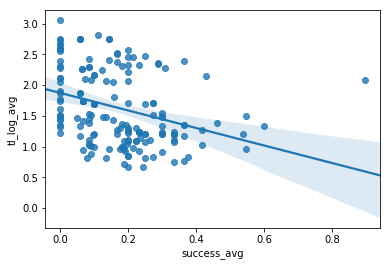

In [189]:
sb.regplot(data = ubase, y = 'tl_log_avg',x = 'success_avg')